In [1]:
import cv2
import numpy as np

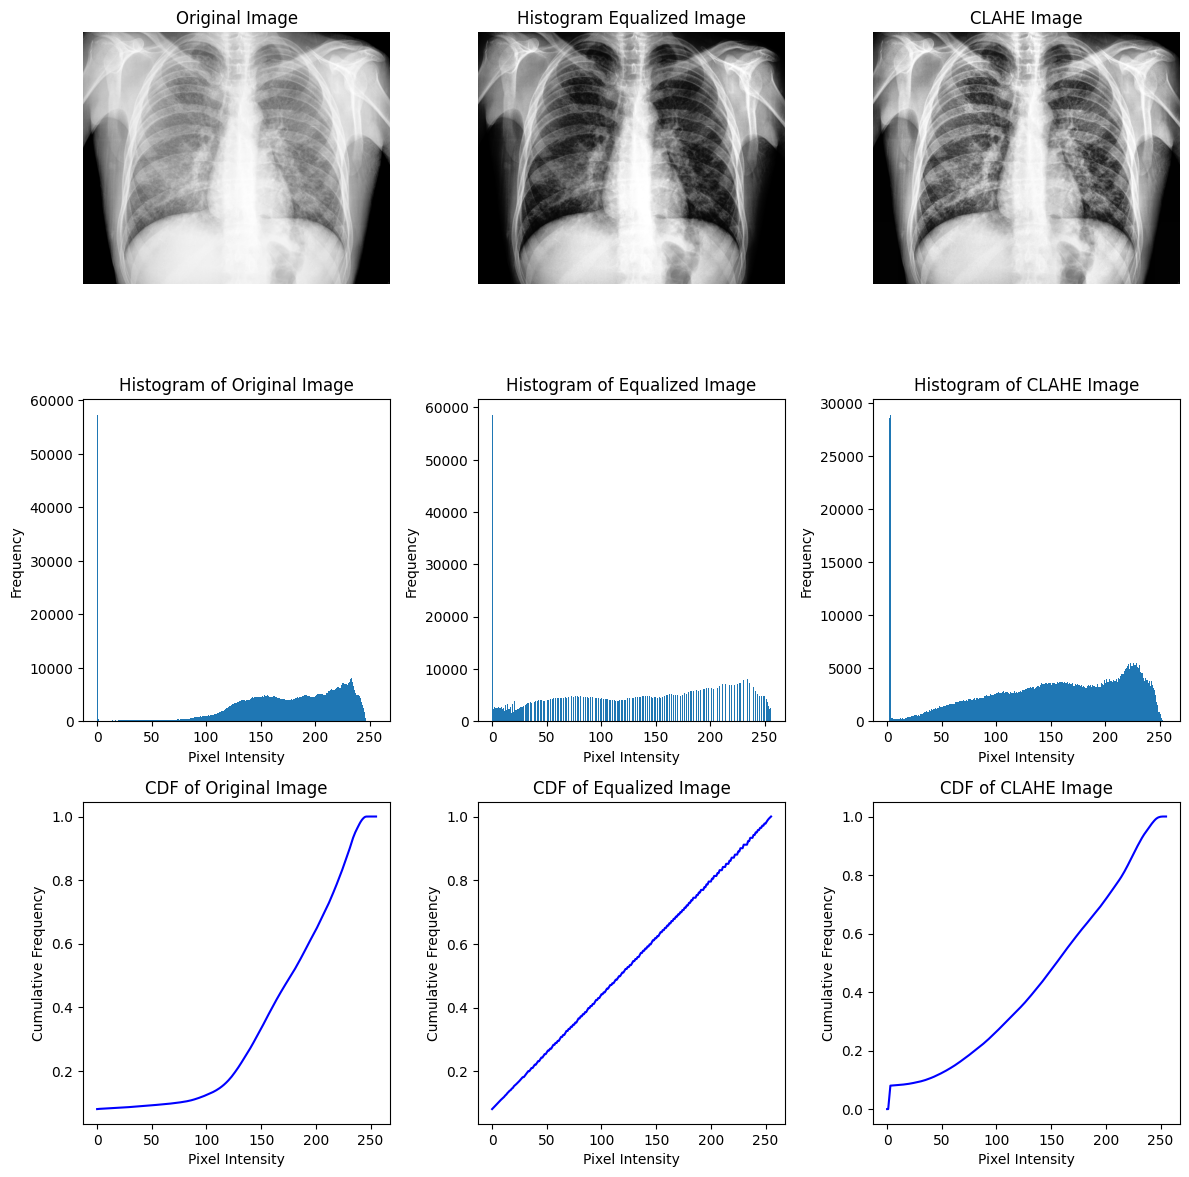

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("D:\\Curated X-Ray Dataset\\COVID-19\\COVID-19 (10).jpg", 0)  # Read as grayscale

# Apply regular Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(image)

# Function to calculate and normalize CDF
def calculate_normalized_cdf(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()  # Normalize to range [0, 1]
    return cdf_normalized

# Plot the images, their histograms, and CDFs
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Histogram of original image
axes[1, 0].hist(image.ravel(), 256, [0, 256])
axes[1, 0].set_title('Histogram of Original Image')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

# CDF of original image
cdf_normalized = calculate_normalized_cdf(image)
axes[2, 0].plot(cdf_normalized, color='b')
axes[2, 0].set_title('CDF of Original Image')
axes[2, 0].set_xlabel('Pixel Intensity')
axes[2, 0].set_ylabel('Cumulative Frequency')

# Equalized image
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Histogram Equalized Image')
axes[0, 1].axis('off')

# Histogram of equalized image
axes[1, 1].hist(equalized_image.ravel(), 256, [0, 256])
axes[1, 1].set_title('Histogram of Equalized Image')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

# CDF of equalized image
cdf_normalized = calculate_normalized_cdf(equalized_image)
axes[2, 1].plot(cdf_normalized, color='b')
axes[2, 1].set_title('CDF of Equalized Image')
axes[2, 1].set_xlabel('Pixel Intensity')
axes[2, 1].set_ylabel('Cumulative Frequency')

# CLAHE image
axes[0, 2].imshow(clahe_image, cmap='gray')
axes[0, 2].set_title('CLAHE Image')
axes[0, 2].axis('off')

# Histogram of CLAHE image
axes[1, 2].hist(clahe_image.ravel(), 256, [0, 256])
axes[1, 2].set_title('Histogram of CLAHE Image')
axes[1, 2].set_xlabel('Pixel Intensity')
axes[1, 2].set_ylabel('Frequency')

# CDF of CLAHE image
cdf_normalized = calculate_normalized_cdf(clahe_image)
axes[2, 2].plot(cdf_normalized, color='b')
axes[2, 2].set_title('CDF of CLAHE Image')
axes[2, 2].set_xlabel('Pixel Intensity')
axes[2, 2].set_ylabel('Cumulative Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

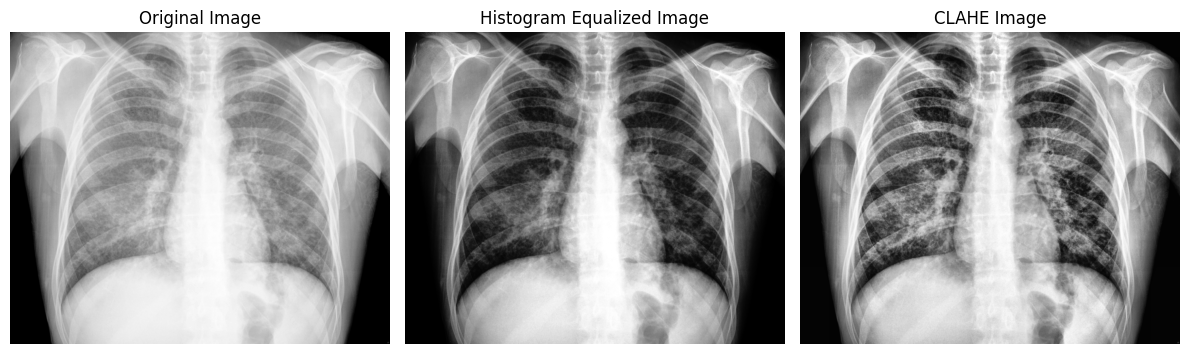

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("D:\Curated X-Ray Dataset\COVID-19\COVID-19 (10).jpg", 0)  # Read as grayscale

# Apply regular Histogram Equalization
equalized_image = cv2.equalizeHist(image)

# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))

# Apply CLAHE to the grayscale image
clahe_image = clahe.apply(image)

# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Equalized image
axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Histogram Equalized Image')
axes[1].axis('off')

# CLAHE image
axes[2].imshow(clahe_image, cmap='gray')
axes[2].set_title('CLAHE Image')
axes[2].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [1]:
import os
import cv2
import shutil
import glob

def apply_histogram_equalization(src_dir, dst_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Traverse the source directory
    for root, dirs, files in os.walk(src_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                # Construct file path
                src_file_path = os.path.join(root, file)
                
                # Read img
                image = cv2.imread(src_file_path, cv2.IMREAD_GRAYSCALE)
                
                # Apply HE
                equalized_image = cv2.equalizeHist(image)
                
                # Construct file path
                relative_path = os.path.relpath(root, src_dir)
                dst_file_dir = os.path.join(dst_dir, relative_path)
                dst_file_path = os.path.join(dst_file_dir, file)
                
                # Create directory if it doesn't exist
                if not os.path.exists(dst_file_dir):
                    os.makedirs(dst_file_dir)
                
                # Save image
                cv2.imwrite(dst_file_path, equalized_image)
                print(f"Processed and saved: {dst_file_path}")

src_directory = r"D:\Dataset\FIX Normal Resized Oversampled"
dst_directory = r"D:\Dataset\FIX HE Resized Oversampled"

apply_histogram_equalization(src_directory, dst_directory)

Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1281_COVID-19 (950).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1293_COVID-19 (723).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1303_COVID-19 (273).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1312_COVID-19 (290).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1314_COVID-19 (233).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1318_COVID-19 (1134).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1319_COVID-19 (54).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1335_COVID-19 (125).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1343_COVID-19 (467).jpg
Processed and saved: D:\Dataset\FIX HE Resized Oversampled\test\COVID-19\1367_COVID-19 (263).jpg
Processed and saved: D:\Datase

In [2]:
import os
import cv2

def apply_clahe(src_dir, dst_dir, clip_limit=3.0, tile_grid_size=(8, 8)):
    # Create the destination directory
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    for root, dirs, files in os.walk(src_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                # Construct file path
                src_file_path = os.path.join(root, file)
                
                # Read img
                image = cv2.imread(src_file_path, cv2.IMREAD_GRAYSCALE)
                
                # Create CLAHE object
                clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
                
                # Apply CLAHE
                clahe_image = clahe.apply(image)
                
                # Construct file path
                relative_path = os.path.relpath(root, src_dir)
                dst_file_dir = os.path.join(dst_dir, relative_path)
                dst_file_path = os.path.join(dst_file_dir, file)
                
                # Create the destination directory if it doesn't exist
                if not os.path.exists(dst_file_dir):
                    os.makedirs(dst_file_dir)
                
                # Save img
                cv2.imwrite(dst_file_path, clahe_image)
                print(f"Processed and saved: {dst_file_path}")

src_directory = r"D:\Dataset\FIX Normal Resized"
dst_directory = r"D:\Dataset\FIX CLAHE Resized"

apply_clahe(src_directory, dst_directory)

Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1008).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1009).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1042).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1047).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1048).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (105).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1051).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (106).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1082).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1083).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1102).jpg
Processed and saved: D:\Dataset\FIX CLAHE Resized\test\COVID-19\COVID-19 (1107